[nltk_data] Downloading package stopwords to C:\Users\Miguel
[nltk_data]     Oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


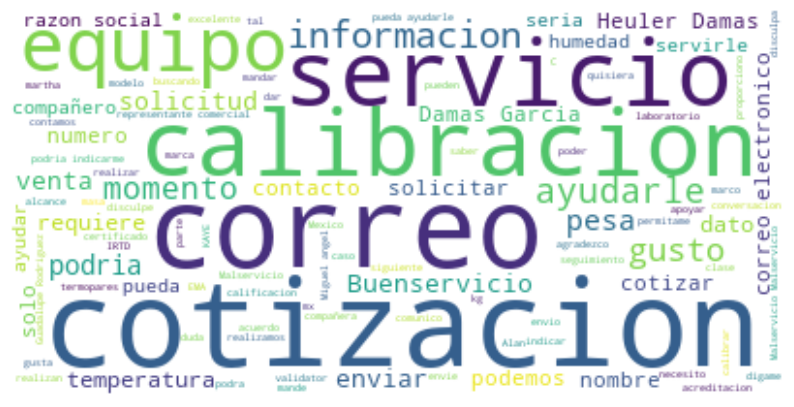

In [1]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Descargar las stopwords de NLTK si es la primera vez que lo usas
nltk.download('stopwords')

# Cargar las stopwords en español 
stop_words = set(stopwords.words('spanish'))  # Se puede cambiar 'spanish' por 'english'

# Agregar stopwords adicionales que consideres innecesarias
custom_stopwords = {'buen','asi', 'despues', 'patrones', 'dos', 'embargo', 'ninguno', 'usted', 'gustaria', 'misma','mas','soporte', 'usuario', 'inscomexico', 'hola', 'com', 'buenas', 'encuesta', 'ustedes', 'insco', 'gracia', 'dia', 'gracias', 'buenos','puedo', 'puede', 'puedes', 'muchas', 'favor', 'si', 'claro', 'dias', 'perfecto'}  # Añade más palabras aquí si es necesario
stop_words.update(custom_stopwords)

# Leer el archivo Chat_Odoo.txt
with open("enc + chat.txt", "r", encoding="utf-8") as file:
    enc_chat = file.read()

# Crear la nube de palabras eliminando las stopwords
wordcloud_enc_chat = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(enc_chat)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_enc_chat, interpolation='bilinear')
plt.axis("off")  # Quitar los ejes
plt.show()
